### Faux gradio

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

PATH_PROJECT = 'C:/Users/evaet/Documents/5A/defi_IA/' 
PATH_IMAGE = os.path.join(PATH_PROJECT,'images')
PATH_UTILITIES = os.path.join(PATH_PROJECT,'code/utilities')

os.chdir(PATH_UTILITIES)

import data_loading as DL
import data_preparation_for_models as DP
import predictions_analysis as PA
from download_prediction import download_pred_Xtest
from data_loading import PATH_DATA

In [7]:
#Choix du modèle 
PATH_MODELS = os.path.join(PATH_PROJECT,'code/models')
os.chdir(PATH_MODELS)
import regression_model as RM 

In [4]:
def predict_price(city, date, language, mobile, hotel_id, stock, group, brand, parking, pool, children_policy) :  
    x = np.array([order_request, city, date, language, mobile, hotel_id, stock, group, brand, parking, pool, children_policy])
    
#1) demande les infos relatives a la requete  
#2) renvoie la prediction de notre modele  

In [5]:
#prep data
data,Y,var_quant,var_quali,var_quali_to_encode = DL.main_load_data()
Y_mod = DP.transform_Y(Y)
X_train,X_vali,Y_train,Y_vali = DP.split_train_vali(data,Y_mod)
X_train,var_quant_new = DP.define_order_requests(X_train,var_quant)
X_vali,_ = DP.define_order_requests(X_vali,var_quant)
X_train,var_quant_last,var_dum,encoder_list =  DP.prepare_input_data(X_train,var_quant_new,var_quali,var_quali_to_encode, encoder_list = {}, Y=Y_train)
X_vali,_,_,_ =  DP.prepare_input_data(X_vali,var_quant_new,var_quali,var_quali_to_encode, encoder_list = encoder_list,Y = Y_vali)
X_train_renorm, scalerX = DP.renorm_var_quant(X_train,var_quant_last,var_dum)
print("coucou")
X_vali_renorm, _ = DP.renorm_var_quant(X_vali,var_quant_last,var_dum,scalerX)
X_train_renorm.drop('avatar_id',axis=1,inplace=True)
X_vali_renorm.drop('avatar_id',axis=1,inplace=True)

C:\Users\evaet\Documents\5A\defi_IA\code\utilities\data_preparation_for_models.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_quant["stock_mod"]=X_quant["stock"].map(lambda x: sqrt(x))
C:\Users\evaet\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


coucou


In [42]:
data_test = pd.read_csv(os.path.join(PATH_DATA,'all_data','test_set_complet.csv'))
new_row = {'order_requests':1, 'city': "vilnius", 'date':21, 'language':"romanian", 'mobile':0, 'avatar_id':1, 'hotel_id':161, 'stock':46,
          'group':"Boss Western", 'brand':"J.Halliday Inn", 'parking':1, 'pool':0, 'children_policy':0}
data_test = data_test.append(new_row, ignore_index=True)
var_quant.append('order_requests')

model_name = 'linear regression'

In [43]:
X_test,_,_,_ = DP.prepare_input_data(data_test,var_quant_new,var_quali,var_quali_to_encode, encoder_list = encoder_list, Y =0)
X_test_renorm, _ = DP.renorm_var_quant(X_test,var_quant_last,var_dum)
X_test_renorm.drop('avatar_id',axis=1,inplace=True)

C:\Users\evaet\Documents\5A\defi_IA\code\utilities\data_preparation_for_models.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_quant["stock_mod"]=X_quant["stock"].map(lambda x: sqrt(x))
C:\Users\evaet\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
#fit (a remplacer par un save poids)
regLin = RM.Model_reg(X_train_renorm,Y_train)

C:\Users\evaet\Documents\5A\defi_IA\code\models\regression_model.py:44: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regLin.fit(X_train,Y_train)
C:\Users\evaet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Temps execution en sec pour l'entrainement : 19.997254200000043


C:\Users\evaet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5265.043578058498, tolerance: 11.356943998042183
  model = cd_fast.enet_coordinate_descent(


In [46]:
model_name

'linear regression'

RMSE =  23.399166968091208
R2 =  0.892554072790934
MAE =  15.682394489279195


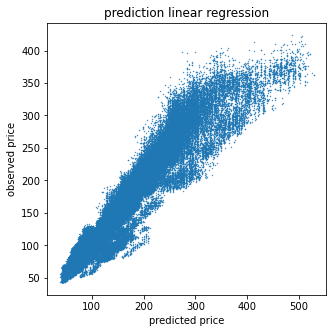

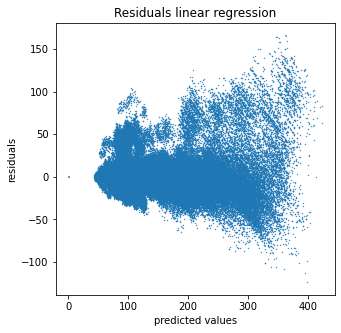

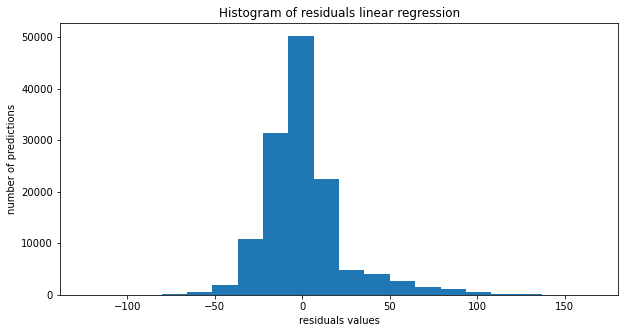

,price
0,93.214002
1,126.186463
2,67.911957
3,57.735106
4,174.166522
...,...
6640,187.494184
6641,123.498710
6642,160.470463
6643,123.498710


In [47]:
#prediction 
scores = RM.Predict_validation_set(X_vali_renorm,Y_vali,regLin,model_name)
RM.Predict_test_set(X_test_renorm,regLin, model_name)

In [48]:
data_test

,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy,city_target,hotel_id_target,language_target,group_target,brand_target
0,1,vilnius,21,romanian,0,1,161,46,Boss Western,J.Halliday Inn,1,0,0,4.592237,4.917355,4.885303,4.846599,4.960246
1,1,vilnius,21,romanian,0,1,187,32,Accar Hotels,Marcure,1,1,0,4.592237,4.917355,4.885303,5.069187,5.217294
2,1,vilnius,21,romanian,0,1,279,12,Independant,Independant,1,0,0,4.592237,4.917355,4.885303,4.512066,4.512066
3,1,vilnius,21,romanian,0,1,395,10,Accar Hotels,Ibas,0,0,0,4.592237,4.917355,4.885303,5.069187,4.366360
4,1,vilnius,21,romanian,0,1,488,42,Accar Hotels,Safitel,1,1,1,4.592237,4.917355,4.885303,5.069187,5.603255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,844,vienna,1,irish,1,794,26,1,Accar Hotels,Marcure,1,0,0,4.929954,4.917355,4.902368,5.069187,5.217294
6641,844,vienna,1,irish,1,794,263,0,Boss Western,Boss Western,1,0,0,4.929954,4.917355,4.902368,4.846599,4.745022
6642,844,vienna,1,irish,1,794,456,0,Yin Yang,Ardisson,1,0,0,4.929954,4.917355,4.902368,4.883146,5.015954
6643,844,vienna,1,irish,1,794,699,0,Boss Western,Boss Western,1,0,0,4.929954,4.917355,4.902368,4.846599,4.745022


In [ ]:
####A COMPRENDRE 

In [ ]:
outputs = gr.outputs.Textbox()

app = gr.Interface(fn=diabetes, inputs=['number','number','number','number','number','number','number','number'], outputs=outputs,description="This is a diabetes model")

In [49]:
import gradio as gr

def greet(name):

    
    return "Hello " + name + "!"

demo = gr.Interface(fn=diabetes, inputs=['number','number','number','number','number','number','number','number'], outputs=outputs,description="This is a diabetes model")
demo.launch()   

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x2870d0f0790>, 'http://127.0.0.1:7860/', None)

In [51]:
def predict_price(order_requests, city, date, language, mobile, avatar_id, hotel_id, stock, group, brand, parking, pool, children_policy) :  
    outputs = gr.outputs.Textbox()

app = gr.Interface(fn=predict_price, inputs=['number','number','number','number','number','number','number','number','number','number','number','number','number'], outputs=outputs,description="Yo")
app.launch()  

NameError: name 'outputs' is not defined

### Vrai gradio

In [14]:
#pip install gradio 
import gradio

In [9]:
# Demander les attributs à l'utilisateur 
in1 = gr.inputs.Dropdown(choices=["Val 1", "Val 2", "Val 3"])
gr.Interface(fn=test_4, 
             inputs=in1, 
             outputs="text").launch()

AttributeError: module 'gradio' has no attribute 'inputs'

In [15]:
def test_1(name):
    return "Vous avez entré cette valeur: " + name + "!"
 
gradio.Interface(fn=test_1, 
             inputs="text", 
             outputs="text").launch()

AttributeError: module 'gradio' has no attribute 'Interface'